In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV files
data_red = pd.read_csv('data/full/winequality-red.csv', delimiter=';')
data_white = pd.read_csv('data/full/winequality-white.csv', delimiter=';')

# Summary statistics
print("\nSummary Statistics for Red Wine:")
data_red.info()
print("\nSummary Statistics for White Wine:")
data_white.info()




Summary Statistics for Red Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Summary Statistics for White Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 e

There are no missing values in the data.

In [13]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
data_white.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


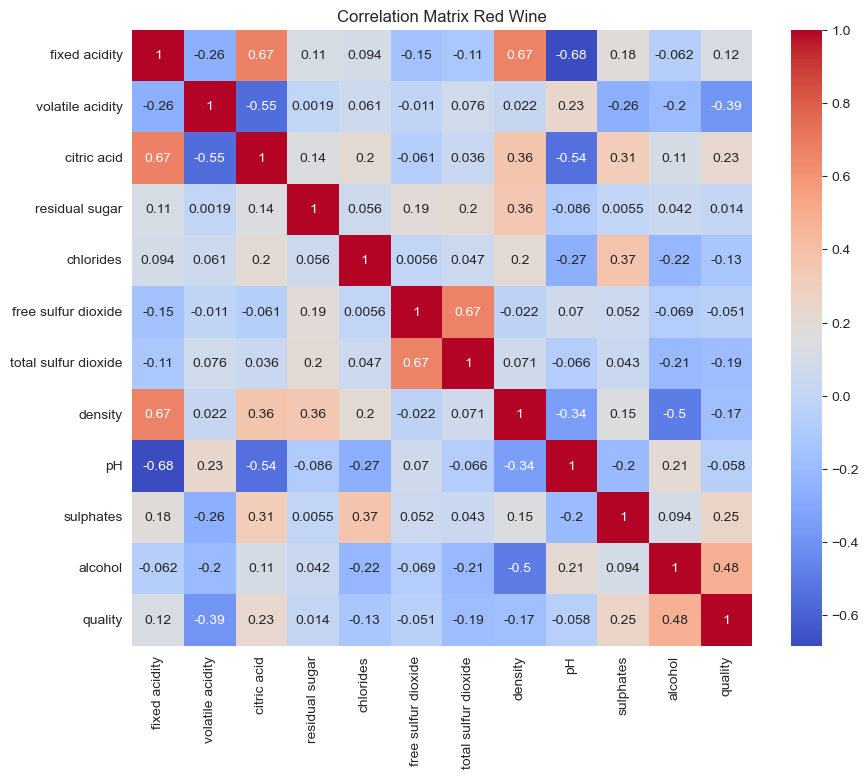

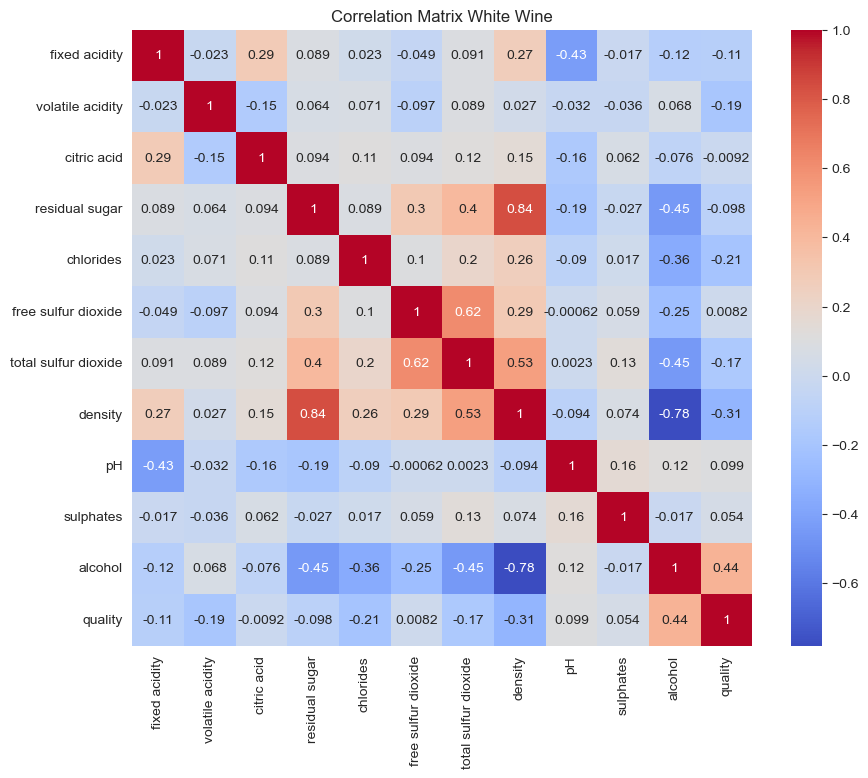

In [15]:
# Correlation matrix
correlation_matrix_red = data_red.corr()
correlation_matrix_white = data_white.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_red, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Red Wine")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_white, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix White Wine")
plt.show()



From the correlation plot, we can make the following refined conclusions:
- Density and Residual Sugar: There is a strong positive correlation between density and residual sugar, particularly for white wine. This suggests that as the residual sugar content increases, the density of the wine also tends to increase.
- Density and Alcohol: There is a noticeable negative correlation between density and alcohol. This implies that as the alcohol content increases, the density of the wine tends to decrease.
- Alcohol and Quality: There is a strong correlation between alcohol and quality for both types of wines. This indicates that wines with higher alcohol content are more likely to have higher quality ratings.
- Density and Quality: There is a slight negative correlation between density and quality. This suggests that wines with higher density may have slightly lower quality ratings.

These conclusions provide insights into the relationships between different variables in the dataset. However, it's important to note that correlation does not imply causation, and further analysis is needed to establish any causal relationships.

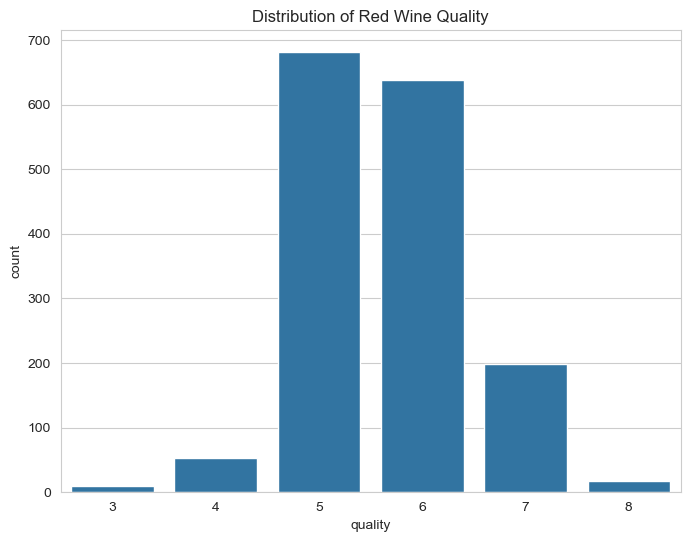

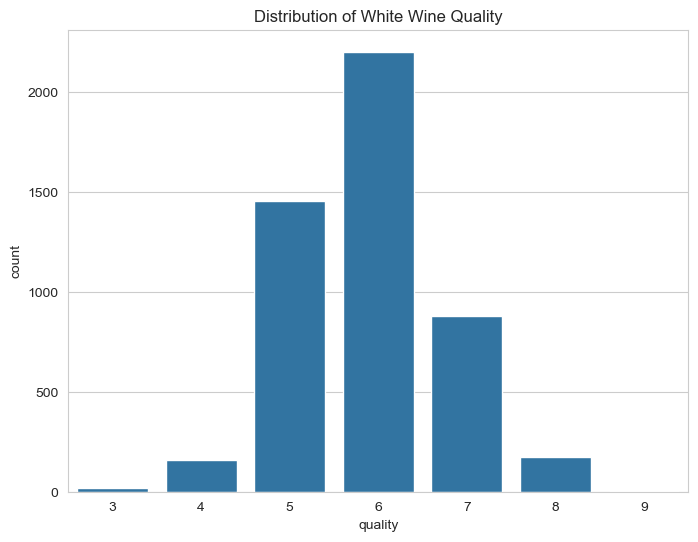

In [16]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data_red)
plt.title("Distribution of Red Wine Quality")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data_white)
plt.title("Distribution of White Wine Quality")
plt.show()

Wines are scored on a scale from 0 to 10; however, it is observed that the quality values typically fall within the range of 3 to 8 for red wine and 3 to 9 for white wine. The most frequently assigned scores are 5 and 6. Also there are no wines with a quality score of 0, 1, or 10.

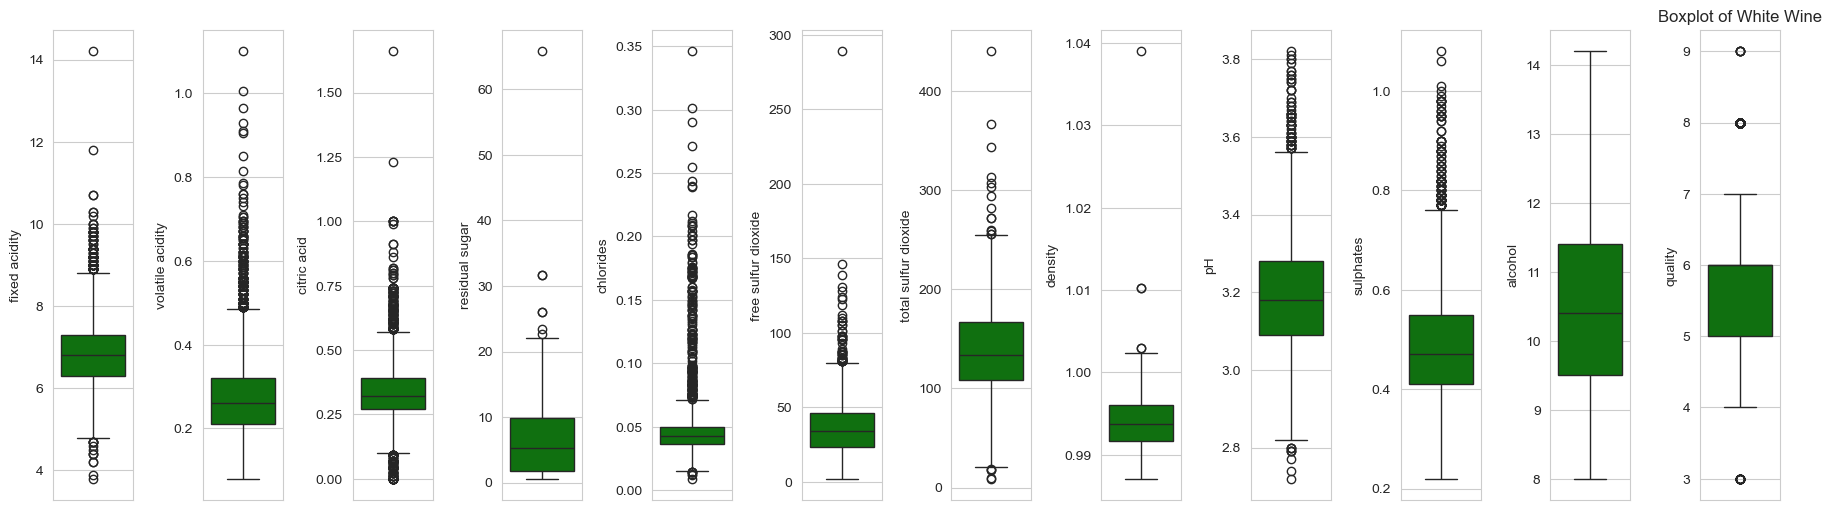

In [17]:
l = data_white.columns.values
number_of_columns = 12
number_of_rows = (len(l) - 1) // number_of_columns + 1

plt.figure(figsize=(number_of_columns*1.5, 5 * number_of_rows))
for i in range(len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data_white[l[i]], color='green', orient='v')
    plt.tight_layout()
plt.title("Boxplot of White Wine")
plt.show()

In the white wine dataset except alcohol all other features columns shows outliers.

In [18]:
plt.figure(figsize=(2*number_of_columns, 5*number_of_rows))
for i in range(len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.histplot(data_white[l[i]], kde=True)
plt.tight_layout()
plt.title("Distribution Plot of White Wine")
plt.show()

The pH column exhibits a normal distribution, while all other independent variables display a right-skewed distribution.

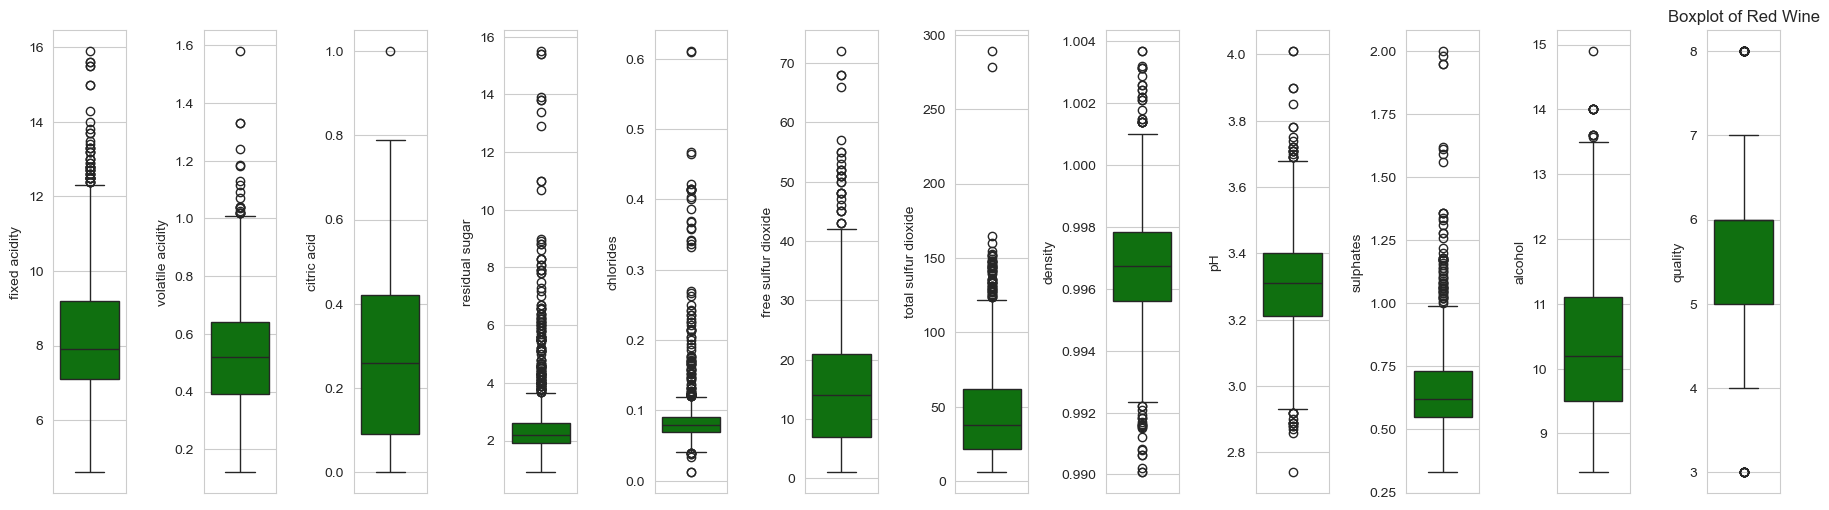

In [ ]:
l = data_red.columns.values
number_of_columns = 12
number_of_rows = (len(l) - 1) // number_of_columns + 1

plt.figure(figsize=(number_of_columns*1.5, 5 * number_of_rows))
for i in range(len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data_red[l[i]], color='green', orient='v')
    plt.tight_layout()
plt.title("Boxplot of Red Wine")
plt.show()

In the red wine dataset, all feature columns exhibit outliers, with the alcohol feature showing the smallest amount of outlier presence.

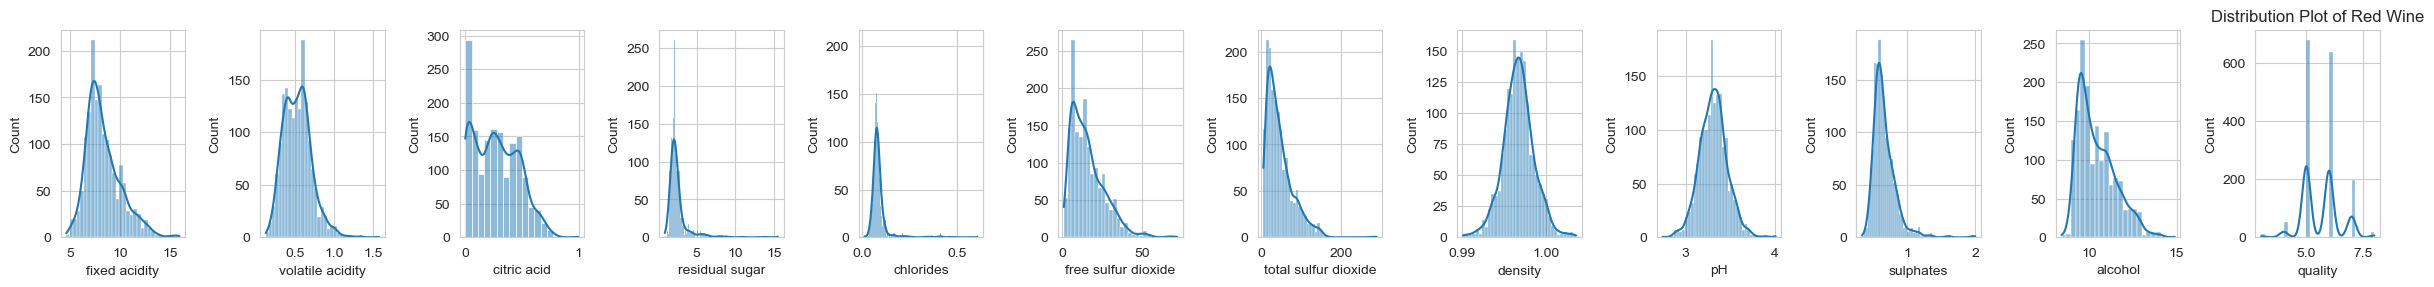

In [ ]:
plt.figure(figsize=(2*number_of_columns, 5*number_of_rows))
for i in range(len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.histplot(data_red[l[i]], kde=True)
plt.tight_layout()
plt.title("Distribution Plot of Red Wine")
plt.show()

The pH and density columns exhibit a normal distribution, while all other independent variables display a right-skewed distribution.

# RFE - Recursive Feature Elimination 

Check the importance of features using RFE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import DataHandler as dh

datasets = dh.read_data("data/full")
X = datasets["winequality-red"].iloc[:, :-1].values
y = datasets["winequality-red"].iloc[:, -1].values
model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=5) 

rfe = rfe.fit(X, y)

features = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), datasets["winequality-red"].columns))
print("Red Wine")
for feature in features:
    print(f"rank: {feature[0]}, {feature[1]}")



rank: 1, alcohol
rank: 1, density
rank: 1, sulphates
rank: 1, total sulfur dioxide
rank: 1, volatile acidity
rank: 2, chlorides
rank: 3, fixed acidity
rank: 4, pH
rank: 5, citric acid
rank: 6, residual sugar
rank: 7, free sulfur dioxide


In [ ]:
datasets = dh.read_data("data/full")
X = datasets["winequality-white"].iloc[:, :-1].values
y = datasets["winequality-white"].iloc[:, -1].values
model = RandomForestClassifier()

rfe = RFE(estimator=model, n_features_to_select=5) 

rfe = rfe.fit(X, y)

features = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), datasets["winequality-red"].columns))
print("White Wine")
for feature in features:
    print(f"rank: {feature[0]}, {feature[1]}")

White Wine
rank: 1, alcohol
rank: 1, density
rank: 1, free sulfur dioxide
rank: 1, residual sugar
rank: 1, total sulfur dioxide
rank: 2, volatile acidity
rank: 3, pH
rank: 4, chlorides
rank: 5, sulphates
rank: 6, citric acid
rank: 7, fixed acidity
